In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.belief_partitions.belief_partition_configs import *
import scripts.pseudo_decoding.belief_partitions.belief_partitions_io as belief_partitions_io

import scipy
import argparse
import copy

In [2]:
def plot_weights(args):
    all_conts = belief_partitions_io.get_contributions_for_all_time(args, region_level="structure_level2", events=["FeedbackOnsetLong"])
    peaks, orders = spike_utils.find_peaks(all_conts, value_col="mean_cont", time_col="abs_time", region_level="structure_level2")
    _, _ = visualization_utils.plot_pop_heatmap_by_time(all_conts, value_col="mean_cont", region_level="structure_level2", orders=orders)

In [3]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.shuffle_method = "session_permute"
args.sig_unit_level = "all_filter_drift"
args.base_output_path = "/data/patrick_res/choice_reward_int"
args.trial_event = "FeedbackOnsetLong"
args.region_level = "structure_level2_cleaned"
args.subject = "both"

Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_2
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_3
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_4
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_6
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_7
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_9
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_2
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_3
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_4
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_6
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_7
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_9
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_2
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_3
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_4
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_6
Warning, shuffle not fou

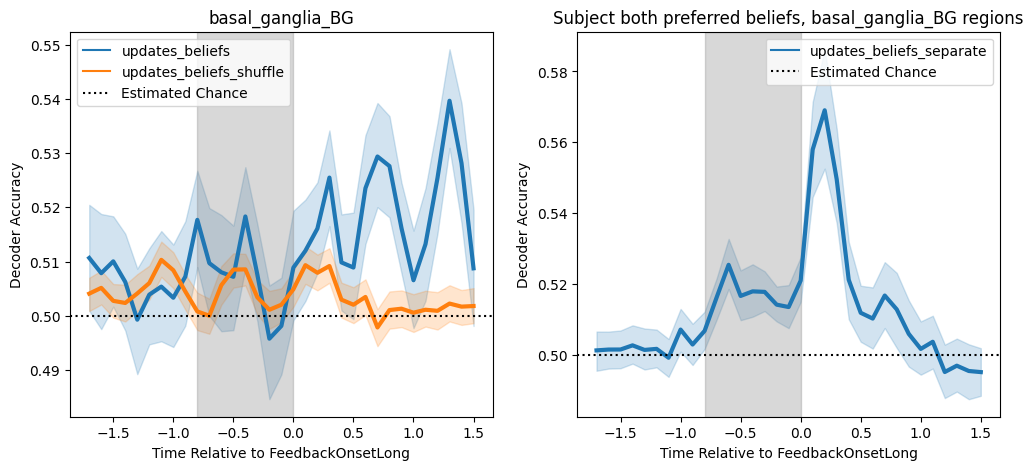

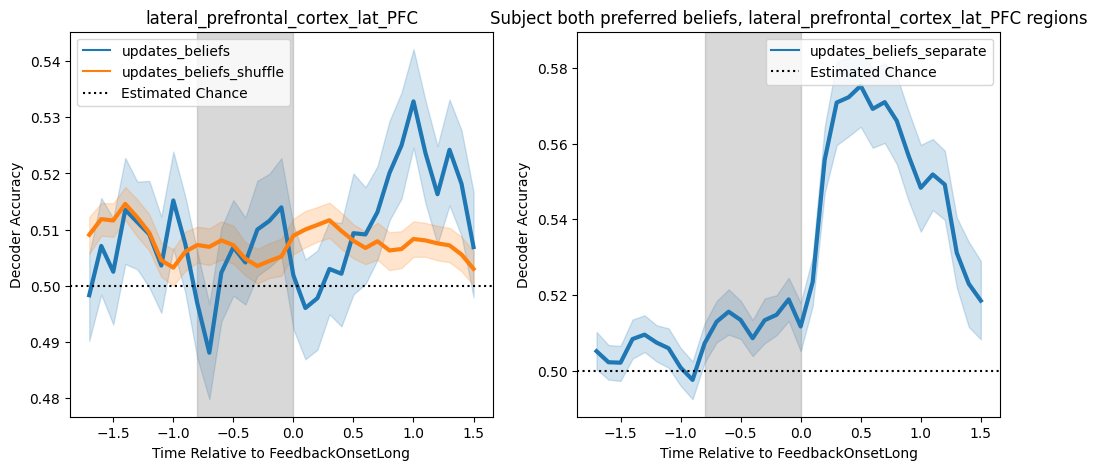

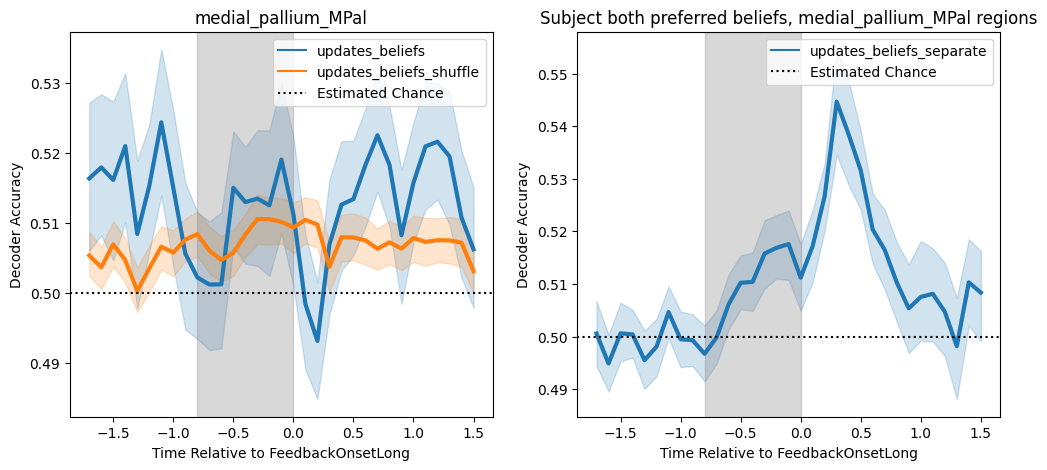

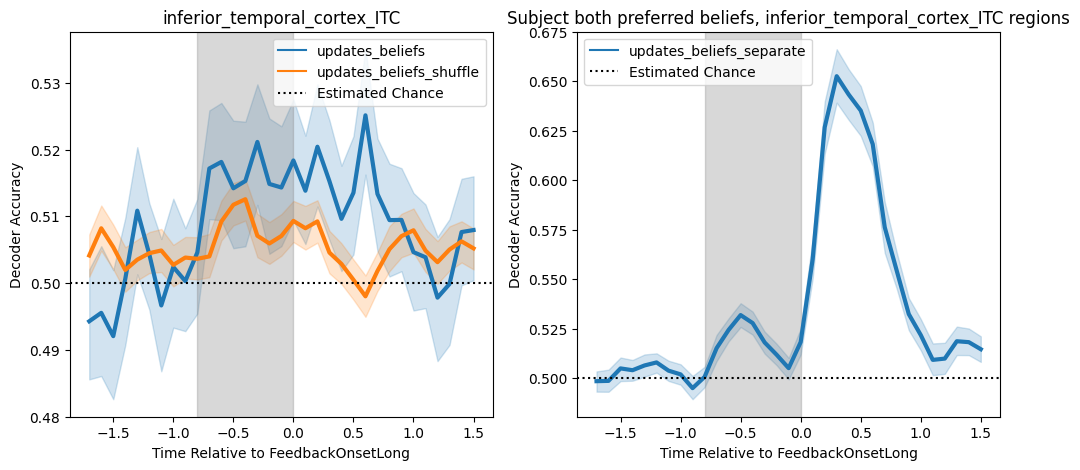

In [54]:
for region in ["basal_ganglia_BG", "lateral_prefrontal_cortex_lat_PFC", "medial_pallium_MPal", "inferior_temporal_cortex_ITC"]:
    args.regions = region
    args.mode = "updates_beliefs"
    res = belief_partitions_io.read_results(args, FEATURES, num_shuffles=10)

    args.mode = "updates_beliefs_separate"
    separate_res = belief_partitions_io.read_results(args, FEATURES, num_shuffles=0)

    # all_res = pd.concat((res, separate_res))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    visualization_utils.visualize_preferred_beliefs(args, res, hue_col="mode", ax=ax1)
    visualization_utils.visualize_preferred_beliefs(args, separate_res, hue_col="mode", ax=ax2)
    ax1.set_title(region)


In [6]:
args = argparse.Namespace(
    **BeliefPartitionConfigs()._asdict()
)
args.shuffle_method = "session_permute"
args.sig_unit_level = "all_filter_drift"
args.base_output_path = "/data/patrick_res/choice_reward_int"
args.trial_event = "FeedbackOnsetLong"
args.subject = "SA"

args.mode = "updates_beliefs"
res = belief_partitions_io.read_results(args, FEATURES, num_shuffles=10)

Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_0
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_1
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_5
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_6
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_7
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_8
Warning, shuffle not found: YELLOW_updates_beliefs_shuffle_9


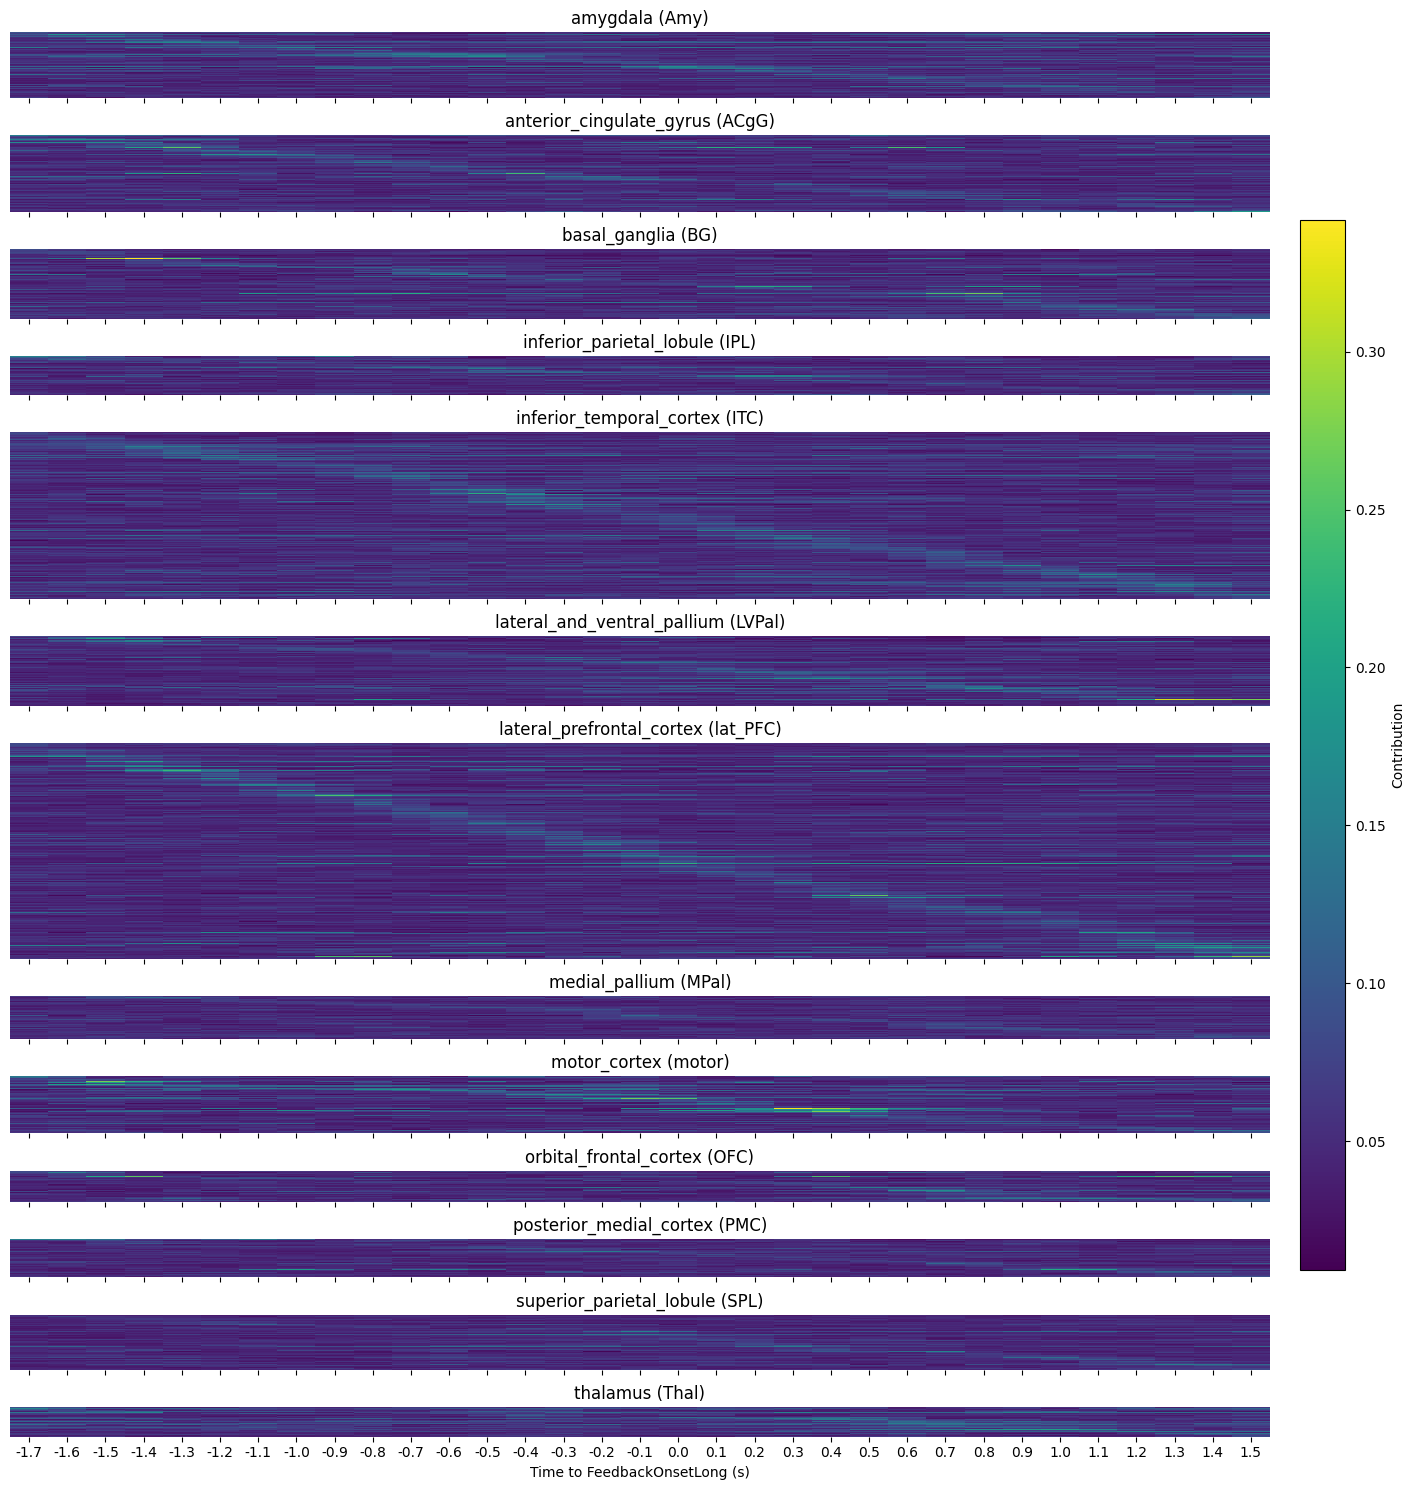

In [7]:

plot_weights(args)